In [1]:
import sys
from collections import defaultdict, Counter
import networkx as nx
import numpy as np
import pylab as plt
import math
#import matplotlib.cm as cm
import statsmodels.api as sm
from os import listdir
from scipy.stats.stats import pearsonr
import json
import random
import itertools
from copy import deepcopy
import time
import scipy as sp
from scipy.sparse import csr_matrix
import matplotlib.cm as cm
from numpy.random import choice
import itertools
from sklearn import manifold
import operator
import itertools
from datetime import datetime as dt
import matplotlib.mlab as mlab
from scipy.stats import norm
import re
from scipy import stats
from scipy.spatial import Voronoi
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from pypinyin import lazy_pinyin

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# flush print
def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(d)
    sys.stdout.flush()

In [3]:
book_df = pd.read_csv('/Users/xuhuimin/Desktop/observed_value_all.csv',names=['node1','node2','app_obs','1','2'])

book_df = book_df[['node1','node2','app_obs']]

G=nx.Graph()
for i in book_df.index:
    G.add_edge(book_df.node1[i],book_df.node2[i], weight=book_df.app_obs[i])

From=[]
To=[]
for ii in book_df.index:
    i,j,w= book_df.node1[ii],book_df.node2[ii], book_df.app_obs[ii]
    a, b = sorted([str(i), str(j)])
    x,y=zip(*[[a,b]]*w)
    From+=x
    To+=y

In [3]:
len(From)

57760956

In [4]:
len(G.nodes())

14484

In [4]:
D=defaultdict(lambda:0)
for x,y in zip(From,To):
    D[(x,y)]+=1 
D=dict(D)

DD=defaultdict(lambda:[])
for i in range(10):
    D1=defaultdict(lambda:0)
    To1=np.random.permutation(To)
    for x,y in zip(From,To1):
        D1[(x,y)]+=1
    for x,y in D1:
        DD[(x,y)].append(D1[(x,y)])
DD=dict(DD)

d=[]
for x,y in D:
    if (x,y) in DD:
        m=np.mean(DD[(x,y)]) 
        sd=np.std(DD[(x,y)])
        if sd==0:
            sd=1
        w=D[(x,y)]
        z1=w-m
        z=(w-m+0.0)/sd
        d.append([x,y,w,z])
data = pd.DataFrame(d)

data.to_csv('./observed_value.csv',header=False,index=False)

In [ ]:
d=[]
for x,y in D:
    if (x,y) in DD:
        m=np.mean(DD[(x,y)]) 
        sd=np.std(DD[(x,y)])
        if sd==0:
            sd=1
        w=D[(x,y)]
        z1=w-m
        z=(w-m+0.0)/sd
        d.append([G.degree()[x],G.degree()[y], m, sd, w, z1, z ])
ki,kj,m,sd,w,z1,z=np.array(d).T

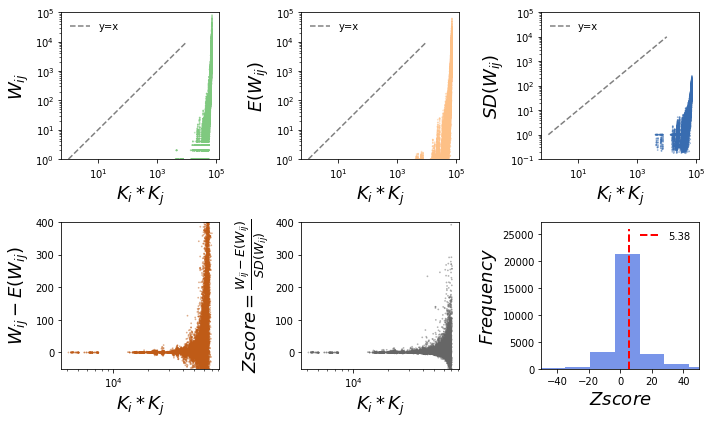

In [38]:
fig = plt.figure(figsize=(10, 6),facecolor='white')
cmap = cm.get_cmap('Accent',5)
ax = fig.add_subplot(231)
plt.scatter(ki*kj,w,facecolor=cmap(0),edgecolor='none',s=3,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.plot([1,10000],[1,10000],linestyle='--',color='gray',label='y=x')
plt.legend(loc=2,frameon=False)
plt.xlabel(r'$K_i*K_j$',size=18)
plt.ylabel(r'$W_{ij}$',size=18)
plt.ylim(1,10**5)

ax = fig.add_subplot(232)
plt.scatter(ki*kj,m,facecolor=cmap(1),edgecolor='none',s=3,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.plot([1,10000],[1,10000],linestyle='--',color='gray',label='y=x')
plt.legend(loc=2,frameon=False)
plt.xlabel(r'$K_i*K_j$',size=18)
plt.ylabel(r'$E(W_{ij})$',size=18)
plt.ylim(1,10**5)

ax = fig.add_subplot(233)
plt.scatter(ki*kj,sd,facecolor=cmap(2),edgecolor='none',s=3,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.plot([1,10000],[1,10000],linestyle='--',color='gray',label='y=x')
plt.legend(loc=2,frameon=False)
plt.xlabel(r'$K_i*K_j$',size=18)
plt.ylabel(r'$SD(W_{ij})$',size=18)
plt.ylim(0.1,10**5)

ax = fig.add_subplot(234)
plt.scatter(ki*kj,z1,facecolor=cmap(3),edgecolor='none',s=3,alpha=0.5)
plt.xscale('log')
#plt.yscale('log')
#plt.plot([1,10000],[1,10000],linestyle='--',color='gray',label='y=x')
#plt.legend(loc=2,frameon=False)
plt.xlabel(r'$K_i*K_j$',size=18)
plt.ylabel(r'$W_{ij} - E(W_{ij})$',size=18)
plt.ylim(-50,400)

ax = fig.add_subplot(235)
plt.scatter(ki*kj,z,facecolor=cmap(4),edgecolor='none',s=3,alpha=0.5)
plt.xscale('log')
#plt.yscale('log')
#plt.plot([1,10000],[1,10000],linestyle='--',color='gray',label='y=x')
#plt.legend(loc=2,frameon=False)
plt.xlabel(r'$K_i*K_j$',size=18)
plt.ylabel(r'$Zscore = \frac{W_{ij} - E(W_{ij})}{SD(W_{ij})}$',size=18)
plt.ylim(-50,400)

ax = fig.add_subplot(236)
mz=np.mean(z)
plt.plot([mz,mz],[0,26000],'r-',linewidth=2,linestyle='--',label=str(np.round(mz,2)))
plt.hist(z,50,color='RoyalBlue',alpha=0.7)
plt.xlim(-50,50)
plt.legend(loc=1,frameon=False)
plt.ylabel(r'$Frequency$',size=18)
plt.xlabel(r'$Zscore $',size=18)

plt.tight_layout()

plt.savefig('/Users/xuhuimin/Desktop/1.png', dpi = 100)

In [105]:
d=[]
for x,y in D:
    if (x,y) in DD:
        m=np.mean(DD[(x,y)]) 
        sd=np.std(DD[(x,y)])
        if sd==0:
            sd=1
        w=D[(x,y)]
        z1=w-m
        z=(w-m+0.0)/sd
        d.append([x,y,w,z])
data = pd.DataFrame(d,columns=['node1','node2','weight','z_score'])


In [100]:
data['pair']=data['node1'].astype('str')+' '+data['node2'].astype('str')

In [101]:
data=data[['pair','z_score']]

In [102]:
data

,pair,z_score
0,微信 手机腾讯网,256.585360
1,QQ 微信,121.998246
2,微信 熊猫桌面,9.104129
3,微信 新浪微博,103.101775
4,iTunes 微信,93.562435
5,微信 百度新闻,49.846091
6,微信 百度贴吧,15.853367
7,微信 掌上百度,205.679434
8,QVOD快播 微信,118.926741
9,UC浏览器 微信,71.231687


In [103]:
data.to_csv('./observed_value.csv',index=False)

In [110]:
data['node3']=data['node1'].map(lambda x: ''.join(lazy_pinyin(str(x))))
data['node4']=data['node2'].map(lambda x: ''.join(lazy_pinyin(str(x))))